<pre>This notebook contains exploratory data analysis of covid-19 trials using clinicaltrials.gov api.

Author - Akshay Chougule
Created on - 16th April 2020
Last Updated - 10th May 2020

Note: This exploration considers covid-19 trials available on clinicaltrials.gov. Although clinicaltrials.gov contains trials running outside the United States, the data might not be comprehensive or up to date.

In [1]:
import pandas as pd
import numpy as np
import requests
import datetime
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_colwidth', 800)

### Section 0. Data Collection and Preprocessing
#### Skip to section 1 if you are interesting in findings.

Since we can get only 1000 trials as the result of this api query and the total number of covid-19 trials exceed 100, we will have to break our query in 2 parts. The first part will cover first thousand results `&min_rnk=1&max_rnk=1000`, the second part would cover next thousand `&min_rnk=1001&max_rnk=2000` and so on.

In [3]:
CT_GOV_URL = 'https://clinicaltrials.gov/api/query/study_fields?expr=COVID-19&min_rnk=1&max_rnk=1000&fmt=json'

In [4]:
rct_fields = [
    'NCTId',
    'DesignAllocation',
    'DesignMasking',
    'LeadSponsorClass',
    'DesignPrimaryPurpose',
    'EnrollmentCount',
    'InterventionName',
    'InterventionType',
    'LastKnownStatus',
    'LeadSponsorName',
    'OutcomeMeasureTimeFrame',
    'LocationCountry',
    'StudyFirstPostDate',
    'StudyFirstPostDateType',
    'StudyFirstSubmitDate',
    'StudyFirstSubmitQCDate',
    'OverallStatus',
    'StudyType',
    'WhyStopped'
]

In [5]:
query_url = f'{CT_GOV_URL}&fields={",".join(rct_fields)}'
print(query_url)

https://clinicaltrials.gov/api/query/study_fields?expr=COVID-19&min_rnk=1&max_rnk=1000&fmt=json&fields=NCTId,DesignAllocation,DesignMasking,LeadSponsorClass,DesignPrimaryPurpose,EnrollmentCount,InterventionName,InterventionType,LastKnownStatus,LeadSponsorName,OutcomeMeasureTimeFrame,LocationCountry,StudyFirstPostDate,StudyFirstPostDateType,StudyFirstSubmitDate,StudyFirstSubmitQCDate,OverallStatus,StudyType,WhyStopped


In [6]:
r = requests.get(query_url)
r.status_code

200

In [7]:
j = json.loads(r.content)
df1 = pd.DataFrame(j['StudyFieldsResponse']['StudyFields'])
df1.shape

(1000, 20)

In [8]:
# Let's get the next 1000
CT_GOV_URL = 'https://clinicaltrials.gov/api/query/study_fields?expr=COVID-19&min_rnk=1001&max_rnk=2000&fmt=json'
query_url = f'{CT_GOV_URL}&fields={",".join(rct_fields)}'
r = requests.get(query_url)
r.status_code
j = json.loads(r.content)
df2 = pd.DataFrame(j['StudyFieldsResponse']['StudyFields'])
df2.shape

(373, 20)

In [9]:
df_base = pd.concat([df1, df2])
df_base.shape

(1373, 20)

#### There are total 1373 trials registered on clinicaltrials.gov for covid-19, as of may 10th 2020

In [10]:
df = df_base
df.head()

,Rank,NCTId,DesignAllocation,DesignMasking,LeadSponsorClass,DesignPrimaryPurpose,EnrollmentCount,InterventionName,InterventionType,LastKnownStatus,LeadSponsorName,OutcomeMeasureTimeFrame,LocationCountry,StudyFirstPostDate,StudyFirstPostDateType,StudyFirstSubmitDate,StudyFirstSubmitQCDate,OverallStatus,StudyType,WhyStopped
0,1,[NCT04372004],[Non-Randomized],[None (Open Label)],[OTHER],[Diagnostic],[100],[diagnostic tests for COVID-19 infection],[Diagnostic Test],[],[Texas Cardiac Arrhythmia Research Foundation],[],[],"[May 1, 2020]",[Actual],"[April 29, 2020]","[April 29, 2020]",[Not yet recruiting],[Interventional],[]
1,2,[NCT04367805],[],[],[OTHER],[],[50],[nasopharyngeal Covid 19 RT-PCR],[Diagnostic Test],[],"[Centre Hospitalier Universitaire, Amiens]",[],[France],"[April 29, 2020]",[Actual],"[April 27, 2020]","[April 27, 2020]",[Recruiting],[Observational],[]
2,3,[NCT04342637],[],[],[OTHER],[],[40],[Practice details],[Other],[],[Al-Azhar University],[],"[United States, Egypt, Egypt, Iran, Islamic Republic of]","[April 13, 2020]",[Actual],"[April 7, 2020]","[April 8, 2020]",[Recruiting],[Observational],[]
3,4,[NCT04323787],[],[],[OTHER],[],[50000],[observational],[Other],[],[Mayo Clinic],[],"[United States, United States, United States, United States]","[March 27, 2020]",[Actual],"[March 24, 2020]","[March 25, 2020]",[Recruiting],[Observational],[]
4,5,[NCT04339322],[],[],[OTHER],[],[200],[Follow up],[Other],[],[Assiut University],[],[],"[April 9, 2020]",[Actual],"[April 7, 2020]","[April 7, 2020]",[Not yet recruiting],[Observational],[]


In [11]:
temp = df['NCTId'].str[0]
temp.head()

0    NCT04372004
1    NCT04367805
2    NCT04342637
3    NCT04323787
4    NCT04339322
Name: NCTId, dtype: object

In [12]:
for col in df.columns[1:]:
    print(col)
    df[col] = df[col].str[0]

NCTId
DesignAllocation
DesignMasking
LeadSponsorClass
DesignPrimaryPurpose
EnrollmentCount
InterventionName
InterventionType
LastKnownStatus
LeadSponsorName
OutcomeMeasureTimeFrame
LocationCountry
StudyFirstPostDate
StudyFirstPostDateType
StudyFirstSubmitDate
StudyFirstSubmitQCDate
OverallStatus
StudyType
WhyStopped


In [13]:
df.head()

,Rank,NCTId,DesignAllocation,DesignMasking,LeadSponsorClass,DesignPrimaryPurpose,EnrollmentCount,InterventionName,InterventionType,LastKnownStatus,LeadSponsorName,OutcomeMeasureTimeFrame,LocationCountry,StudyFirstPostDate,StudyFirstPostDateType,StudyFirstSubmitDate,StudyFirstSubmitQCDate,OverallStatus,StudyType,WhyStopped
0,1,NCT04372004,Non-Randomized,None (Open Label),OTHER,Diagnostic,100,diagnostic tests for COVID-19 infection,Diagnostic Test,NaN,Texas Cardiac Arrhythmia Research Foundation,NaN,NaN,"May 1, 2020",Actual,"April 29, 2020","April 29, 2020",Not yet recruiting,Interventional,NaN
1,2,NCT04367805,NaN,NaN,OTHER,NaN,50,nasopharyngeal Covid 19 RT-PCR,Diagnostic Test,NaN,"Centre Hospitalier Universitaire, Amiens",NaN,France,"April 29, 2020",Actual,"April 27, 2020","April 27, 2020",Recruiting,Observational,NaN
2,3,NCT04342637,NaN,NaN,OTHER,NaN,40,Practice details,Other,NaN,Al-Azhar University,NaN,United States,"April 13, 2020",Actual,"April 7, 2020","April 8, 2020",Recruiting,Observational,NaN
3,4,NCT04323787,NaN,NaN,OTHER,NaN,50000,observational,Other,NaN,Mayo Clinic,NaN,United States,"March 27, 2020",Actual,"March 24, 2020","March 25, 2020",Recruiting,Observational,NaN
4,5,NCT04339322,NaN,NaN,OTHER,NaN,200,Follow up,Other,NaN,Assiut University,NaN,NaN,"April 9, 2020",Actual,"April 7, 2020","April 7, 2020",Not yet recruiting,Observational,NaN


^ This looks good now.

### 1. Distribution of Trial Registration Dates

In [14]:
df["StudyFirstPostDate"] = df["StudyFirstPostDate"].astype("datetime64")
df.StudyFirstPostDate.max(), df.StudyFirstPostDate.min()

(Timestamp('2020-05-08 00:00:00'), Timestamp('2011-03-01 00:00:00'))

<pre>The max date looks good but the min date here is from 2011.

According to the WHO the first case of covid-19 was found in late December 2019. So let's use that as a cutoff date.

source: https://www.who.int/news-room/detail/27-04-2020-who-timeline---covid-19


In [15]:
# Select trials registered only after Jan 1st 2020
df = df[df.StudyFirstPostDate>datetime.date(2020,1,1)]
df.shape

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


(1338, 20)

In [16]:
df.StudyFirstPostDate.max(), df.StudyFirstPostDate.min()

(Timestamp('2020-05-08 00:00:00'), Timestamp('2020-01-27 00:00:00'))

<pre>^ Now the dates look good.

So we have 1338 covid-19 trials registered on clinicaltrials.gov since Jan 1st, 2020.

Let's check the month-based distribution.

In [17]:
df.groupby([df["StudyFirstPostDate"].dt.month]).NCTId.count()

StudyFirstPostDate
1      3
2     61
3    179
4    857
5    238
Name: NCTId, dtype: int64

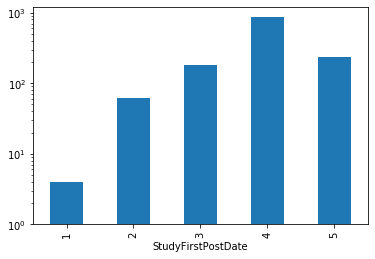

In [18]:
# Let's plot the results on log scale since per month trials vary from 3 to 857
df.groupby([df["StudyFirstPostDate"].dt.month]).NCTId.count().plot(kind="bar", log=True)

### Breakdown of covid-19 clinical trials since Jan 1st, 2020,
<pre>
Jan 2020 - 3
Feb 2020 - 61
Mar 2020 - 179
Apr 2020 - 857
May 2020 - 238 (till 10th May only)
</pre>

### 2. Types of Intervention and Design Purpose

In [19]:
# All covid-19 trials
df.shape[0]

1338

In [20]:
# Select Interventional trials 
df = df[df.StudyType=='Interventional']
df.shape[0]

787

<pre>^ Roughly 60% of trials (787 out of the 1338) are interventional.

Let's see what type of interventions they are recieving.

In [21]:
tt = df.groupby("InterventionType", as_index=False).NCTId.count().sort_values(by=['NCTId'], ascending=False)
tt

,InterventionType,NCTId
6,Drug,465
1,Biological,99
8,Other,76
3,Device,48
0,Behavioral,38
4,Diagnostic Test,20
9,Procedure,18
5,Dietary Supplement,11
2,Combination Product,7
10,Radiation,3


<pre>^ As expected majority of the interventional trials (564 out of 787, or 71.66 %) are recieving Drug or Biological 
interventions.

However, surprisingly only 20 trials (~ 2.5%) are associated with diagnostic tests.


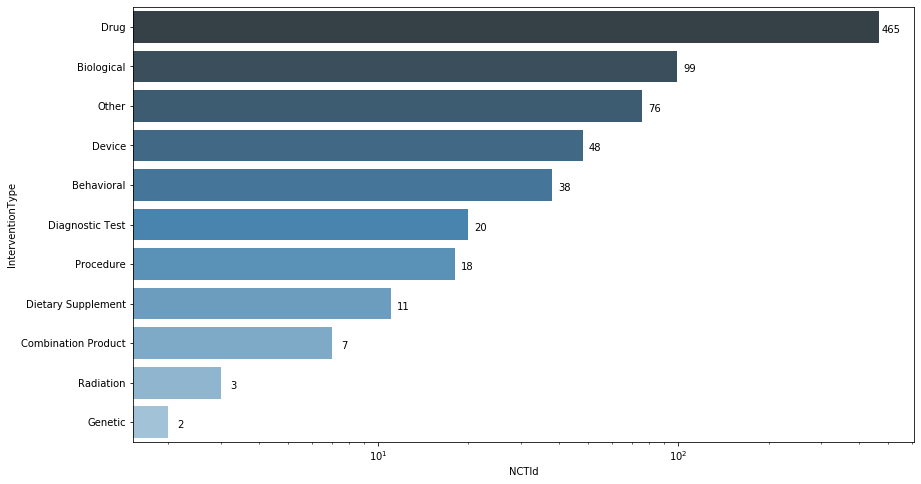

In [22]:
plt.figure(figsize=(14,8))
graph = sns.barplot(y="InterventionType", x="NCTId", data=tt, palette="Blues_d", log=True)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+(p.get_width()/10), p.get_y()+0.6),
                    ha='center', va='bottom', color= 'black')

**What is the distribution of primary purpose of trials?**

In [23]:
tt = df.groupby("DesignPrimaryPurpose", as_index=False).NCTId.count().sort_values(by=['NCTId'], ascending=False)
tt

,DesignPrimaryPurpose,NCTId
8,Treatment,569
5,Prevention,106
7,Supportive Care,32
2,Diagnostic,28
4,Other,27
3,Health Services Research,11
0,Basic Science,6
6,Screening,6
1,Device Feasibility,2


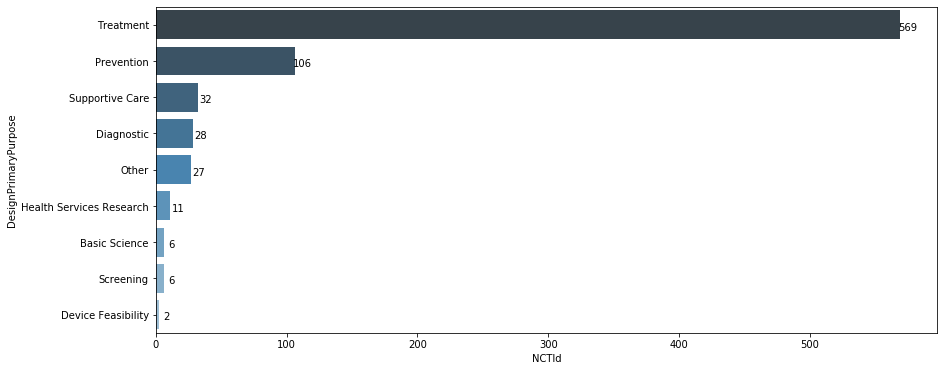

In [24]:
plt.figure(figsize=(14,6))
graph = sns.barplot(y="DesignPrimaryPurpose", x="NCTId", data=tt, palette="Blues_d")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+6, p.get_y()+0.6),
                    ha='center', va='bottom', color= 'black')

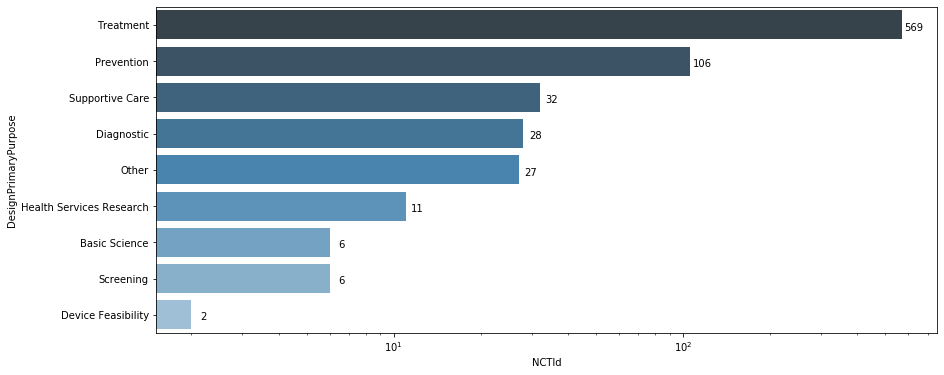

In [25]:
# Adding log scale to make the viz better
plt.figure(figsize=(14,6))
graph = sns.barplot(y="DesignPrimaryPurpose", x="NCTId", data=tt, palette="Blues_d", log=True)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+(p.get_width()/10), p.get_y()+0.6),
                    ha='center', va='bottom', color= 'black')

### 3. Treatment interventions for covid-19

In [26]:
tt = df.loc[df.DesignPrimaryPurpose=='Treatment',]
tt.shape[0]

569

<pre>^ So there are 569 treatment intervention trials. And the distribution of the intervention type looks 
like this:

In [27]:
tt1 = tt.groupby("InterventionType", as_index=False).NCTId.count().sort_values(by=['NCTId'], ascending=False)
tt1

,InterventionType,NCTId
5,Drug,397
1,Biological,75
7,Other,34
3,Device,27
0,Behavioral,10
8,Procedure,10
2,Combination Product,7
4,Dietary Supplement,6
9,Radiation,2
6,Genetic,1


Text(0.5, 1.0, 'Intervention Type distribution where Purpose = Treatment')

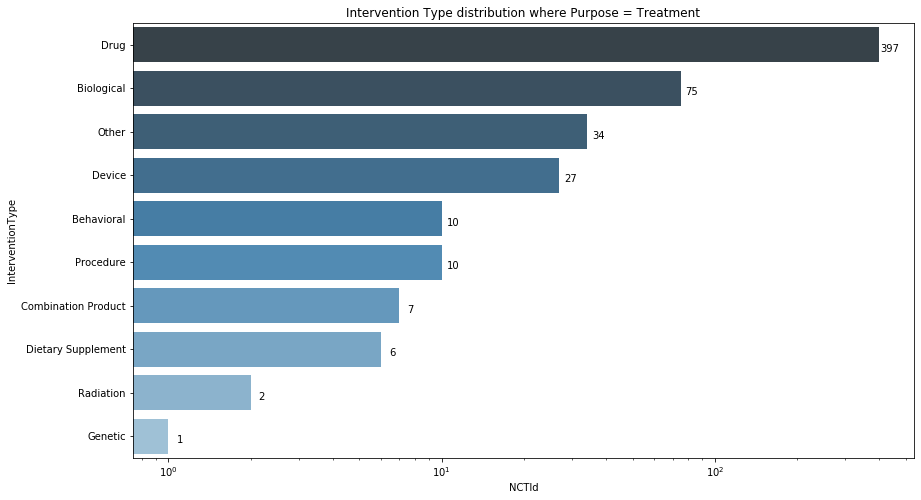

In [28]:
plt.figure(figsize=(14,8))
graph = sns.barplot(y="InterventionType", x="NCTId", data=tt1, palette="Blues_d", log=True)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+(p.get_width()/10), p.get_y()+0.6),
                    ha='center', va='bottom',
                    color= 'black')
graph.set_title('Intervention Type distribution where Purpose = Treatment')

**What are some widely used drugs for treatment of covid-19?**

In [29]:
tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType=='Drug'),]
covid_drugs = tt.groupby('InterventionName', as_index=False).NCTId.count().sort_values('NCTId', ascending=False)
covid_drugs.reset_index(drop=True)
covid_drugs.iloc[:15,]

,InterventionName,NCTId
121,Hydroxychloroquine,36
241,Tocilizumab,11
101,Favipiravir,7
129,Hydroxychloroquine Sulfate,6
69,Colchicine,6
203,Remdesivir,5
206,Ruxolitinib,5
33,Azithromycin,5
212,Sarilumab,4
160,Lopinavir/ritonavir,4


<pre>Let's standardize the HQC treatment names, and look at top 15 drugs

In [30]:
df.InterventionName.replace(to_replace='Hydroxychloroquine Sulfate',value='Hydroxychloroquine',inplace=True)
df.InterventionName.replace(to_replace='Hydroxychloroquine (HCQ)',value='Hydroxychloroquine',inplace=True)

tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType=='Drug'),]
tt1 = tt.groupby('InterventionName', as_index=False).NCTId.count()
covid_drugs = tt1.sort_values('NCTId', ascending=False)
covid_drugs.iloc[:15,]

,InterventionName,NCTId
121,Hydroxychloroquine,45
239,Tocilizumab,11
101,Favipiravir,7
69,Colchicine,6
204,Ruxolitinib,5
201,Remdesivir,5
33,Azithromycin,5
210,Sarilumab,4
158,Lopinavir/ritonavir,4
66,Clazakizumab,3


<pre>^ These are the top drug interventions used for the treatment in covid-19 trials.

As Hydroxychloroquine is most common intervention, it would be interesting to see combotherapies with it.

#### What therapies are combined with Hydroxychloroquine?

In [31]:
tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType=='Drug'),]
covid_drugs = tt.groupby('InterventionName', as_index=False).NCTId.count().sort_values('NCTId', ascending=False)
covid_drugs[covid_drugs.InterventionName.str.lower().str.contains('hydroxychloroquine')]

,InterventionName,NCTId
121,Hydroxychloroquine,45
129,Hydroxychloroquine Sulfate Regular dose,2
264,hydroxychloroquine in combination with camostat mesylate,1
265,hydroxychloroquine sulfate 200 MG,1
45,Bromhexine Oral Tablet and/or hydroxychloroquine tablet,1
59,Chloroquine or Hydroxychloroquine,1
60,Chloroquine or hydroxychloroquine,1
130,Hydroxychloroquine and Azithromycin,1
122,Hydroxychloroquine + Azithromycin,1
123,Hydroxychloroquine + azithromycin,1


<pre>
^ Azithromycin looks like a top choice for combination with Hydroxychloroquine.

"Azithromycin is an antibiotic that fights bacteria. It is used to treat many different types of infections caused by bacteria, such as respiratory infections, skin infections, ear infections, eye infections, and 
sexually transmitted diseases." - <a href="https://www.drugs.com/azithromycin.html">drugs.com</a>

There is this widely cited paper of Hydroxychloroquine treatment of covid-19 patients. It claims in the 
result section that "Azithromycin added to hydroxychloroquine was significantly more efficient for virus 
elimination." However this study had a pretty small population. <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7102549/">PubMed</a>

</pre>


**What kind of biological interventions are used for treatment of covid-19?**

In [32]:
# Let's look at the top 15 records
tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType=='Biological'),]
covid_biological = tt.groupby('InterventionName', as_index=False).NCTId.count().sort_values('NCTId', ascending=False)
covid_biological.iloc[:15,]

,InterventionName,NCTId
17,Convalescent Plasma,7
21,Convalescent plasma,3
56,anti-SARS-CoV-2 convalescent plasma,3
50,UC-MSCs,3
30,MSCs,2
0,Allogeneic NK transfer,1
41,Ozone auto-hemotherapy,1
44,Plasma exchange,1
43,Plasma,1
42,Pathogen-specific aAPC,1


#### What kind of dietary supplements are used?

In [33]:
tt = df.loc[(df.DesignPrimaryPurpose=='Treatment') & (df.InterventionType=='Dietary Supplement'),]
covid_supplement = tt.groupby('InterventionName', as_index=False).NCTId.count().sort_values('NCTId', ascending=False)
covid_supplement

,InterventionName,NCTId
0,Ketogenic diet,1
1,Natural Honey,1
2,Vitamin C,1
3,Vitamin D,1
4,Vitamins,1
5,Zinc gluconate,1


### 4. Geographical distribution of covid-19 trials

**Which countries are part of the covid-19 trials?**

In [34]:
len(df.LocationCountry.unique()), df.LocationCountry.unique()

(52,
 array([nan, 'Colombia', 'Egypt', 'Belgium', 'France', 'Thailand',
        'United States', 'China', 'Canada', 'Iceland', 'India', 'Chile',
        'Austria', 'Italy', 'Spain', 'Turkey', 'Iran, Islamic Republic of',
        'Switzerland', 'Mexico', 'Jordan', 'Malaysia', 'French Guiana',
        'Germany', 'Denmark', 'Hong Kong', 'Saudi Arabia', 'Pakistan',
        'Russian Federation', 'South Africa', 'United Kingdom', 'Tunisia',
        'Bosnia and Herzegovina', 'Australia', 'Poland', 'Brazil',
        'Bahrain', 'Argentina', 'Israel', 'Greece', 'Netherlands',
        'Korea, Republic of', 'Vietnam', 'Sweden', 'Norway', 'Ireland',
        'Puerto Rico', 'Slovenia', 'Nigeria', 'Iraq', 'Indonesia',
        'Gibraltar', 'Romania'], dtype=object))

<pre>
^ The trials are based in 52 countries.

This does NOT seem right, the number seems too low. The United Nations has 193 countries. So probably the  information on sites is not comprehensive or updated.

Interestingly (rather unfortunately) there are hardly any countries from Africa.
</pre>

In [35]:
df['EnrollmentCount'] = pd.to_numeric(df['EnrollmentCount'])

In [36]:
# Let's explore the treatment trial distribution across geographies.
tt = df[(df.DesignPrimaryPurpose=='Treatment') & (df.StudyType=='Interventional')]
tt.groupby('LocationCountry', as_index=False).agg({'EnrollmentCount': ['count','sum', 'mean']}).sort_values([('EnrollmentCount', 'count')], ascending=False)[:20]

LocationCountry EnrollmentCount                   
                                        count    sum        mean
45              United States             137  61248  447.065693
8                       China              51   6239  122.333333
12                     France              46  16431  357.195652
38                      Spain              25   3497  139.880000
24                      Italy              21   7766  369.809524
6                      Canada              16  10063  628.937500
5                      Brazil              15   5198  346.533333
20  Iran, Islamic Republic of              13    570   43.846154
11                      Egypt              13   1640  126.153846
13                    Germany              11   4584  416.727273
28                     Mexico              10   1954  195.400000
44             United Kingdom               7   5240  748.571429
10                    Denmark               7   3761  537.285714
23                     Israel               6    940  156.666667
29                Netherlands               5   2245  449.000000
34         Russian Federation               5   1466  293.200000
33                     Poland               5   1030  206.000000
40                Switzerland               4    444  111.000000
18                      India               4    230   57.500000
9                    Colombia               4   1700  425.000000

<pre>^ This represents the country, number of treatment-purposed trials, total number of patients part of 
treatment-purposed trials, average number of patients enrolled in these trials.

The United States has 1 out of 4 treatment-purposed interventional trials (137 out of 569).

Although China is at second position the total number of enrolled subjects is small. This might be due to 
the recovery the country has claimed.

France and Germany has same number* of covid-19 positive cases - 170k to 175k. However, France is running 4 times more trials with roughly 4 times more patients. This might be because Germany's covid-19 mortality 4 times lower than France.

*Data as of 10th of May, source: https://www.worldometers.info/coronavirus/

### 5. Trial enrollment distribution

**How many total subjects are part of these trials?**

In [37]:
df.EnrollmentCount.sum()

913577

<pre>
Considering the total covid-19 cases are around 4M, this number close to 1M seems a little high.

This might be a data entry error. So let's explore more.
</pre>

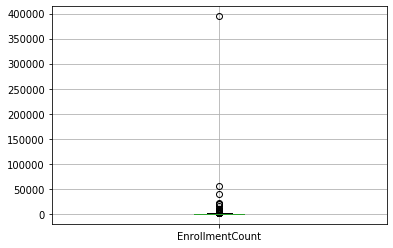

In [38]:
df.boxplot(column='EnrollmentCount')

<pre> There seems to be an outlier - a single trial, which is 8 times bigger than the second biggest trial. </pre>

In [39]:
df.EnrollmentCount.max()

394578

In [40]:
df[df.EnrollmentCount==df.EnrollmentCount.max()].NCTId

144    NCT04370886
Name: NCTId, dtype: object

<pre>So the trial NCT04370886 has expected enrollment of 394,578. If you check the trial on clinicaltrials.gov 
the information is true, however this is a trial to "Recruit Blood Donors Via SMS With Different Contents 
During Epidemic of COVID-19". 

So the intervention here is the text in the sms.

We can eliminate these types of trials by adding a filter of PrimaryPurpose=Treatment.
</pre>

In [41]:
tt = df[df.DesignPrimaryPurpose=='Treatment']
tt.EnrollmentCount.sum()

195478

<pre>This looks better. The (expected) enrollment count for trials treating covid-19 is approaching 200,000. 

Even this number should be taken with a grain of salt as
- not all trials will meet their enrollmemt targets
- there might be more inteventional trials which are not yet registered on clinicaltrials.gov
</pre>

**Let's explore more about the subject count distribution in treatment-purposed trials.**

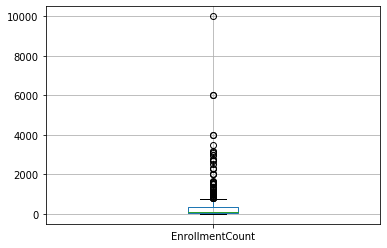

In [42]:
tt.boxplot(column='EnrollmentCount')

<pre>Again there are a few outliers here. Let's check the top one.

In [43]:
tt[tt.EnrollmentCount==tt.EnrollmentCount.max()].NCTId

816    NCT04343001
Name: NCTId, dtype: object

<pre> 
NCT04343001 is an interesting trial by London School of Hygiene and Tropical Medicine with expected 
enrollment of 10,000.
</pre>

<pre>
Let's look at the interquartile range of the expected enrollment counts/.</pre>

In [44]:
tt.EnrollmentCount.describe()

count      569.000000
mean       343.546573
std        754.310252
min          0.000000
25%         49.000000
50%        120.000000
75%        330.000000
max      10000.000000
Name: EnrollmentCount, dtype: float64

<pre>^ The median subject enrollment is 120 for treatment-purposed intervention trials.

And the middle 50% of the trials (w treatment interventions) enroll between 49 to 330 patients.

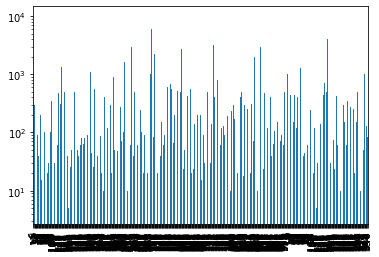

In [45]:
tt.EnrollmentCount.plot(kind="bar", log=True)

<pre> ^ Not a very helpful graph but it looks there is no unimodal or bimodal distribution here.

### 6. Trial sponsor distribution

**What are the leading sponsors running the covid-19 trials?**

In [46]:
len(df.LeadSponsorName.unique())

525

In [47]:
df.shape

(787, 20)

<pre>
^ Wow, there are more than 500+ unique lead sponsors for 787 interventional trials.

Let's look at the top sponsors with maximum number of (expected) enrollment.</pre>

In [48]:
tt1 = tt.groupby('LeadSponsorName', as_index=False).EnrollmentCount.sum()
covid_drugs = tt1.sort_values('EnrollmentCount', ascending=False)
covid_drugs.iloc[:15,]

,LeadSponsorName,EnrollmentCount
187,London School of Hygiene and Tropical Medicine,10000
13,Assistance Publique - Hôpitaux de Paris,8124
100,Gilead Sciences,7600
368,University of Minnesota,7280
212,Montreal Heart Institute,6000
337,"University Hospital, Angers",5560
24,Bassett Healthcare,4000
342,"University Hospital, Lille",3620
335,University Hospital Tuebingen,3510
143,Imperial College London,3170


<pre>Interestingly there are hardly any industry sponsors in here, with the exception of Gilead.

So let's look at the sponsor class distribution.

In [49]:
tt1 = tt.groupby('LeadSponsorClass', as_index=False).EnrollmentCount.sum()
covid_drugs = tt1.sort_values('EnrollmentCount', ascending=False)
covid_drugs.iloc[:15,]

,LeadSponsorClass,EnrollmentCount
4,OTHER,152695
1,INDUSTRY,27088
5,OTHER_GOV,12175
3,NIH,2800
0,FED,440
2,NETWORK,280


<pre>The industry sponsors were able to get less than 14% of the pie.

Perhaps this is due to collaboration where a hospital or university is the lead sponsor and industry player is the secondary sponsor.

Let's check top players for each class.

**Top Sponsors in 'Industry' category - includes pharmaceutical, biotech and device companies**

In [50]:
ss = tt[tt.LeadSponsorClass=='INDUSTRY']
tt1 = ss.groupby('LeadSponsorName', as_index=False).agg({'EnrollmentCount': ['sum', 'count', 'mean']})
tt1.sort_values([('EnrollmentCount', 'sum')], ascending=False)[:20]

LeadSponsorName EnrollmentCount              
                                                         sum count    mean
29                           Gilead Sciences            7600     2  3800.0
49                    Marker Therapeutics AG            2000     1  2000.0
53                  Novartis Pharmaceuticals            1296     3   432.0
69                        UnitedHealth Group             850     1   850.0
30                           GlaxoSmithKline             800     1   800.0
10                             Azidus Brasil             758     5   151.6
36                                Immunic AG             600     1   600.0
19                   Cadila Pharnmaceuticals             520     2   260.0
62                                    Sanofi             510     2   255.0
6                    Apsen Farmaceutica S.A.             500     1   500.0
38                        Incyte Corporation             500     1   500.0
8                                AstraZeneca             488     2   244.0
24                             CytoDyn, Inc.             465     2   232.5
31                 Hamad Medical Corporation             456     1   456.0
33                         Hoffmann-La Roche             430     2   215.0
44  Jiangxi Qingfeng Pharmaceutical Co. Ltd.             428     2   214.0
58                 Regeneron Pharmaceuticals             400     1   400.0
9                              Athersys, Inc             400     1   400.0
48             Laboratorio Elea Phoenix S.A.             400     1   400.0
23                     Covis Pharma S.à.r.l.             400     1   400.0

<pre>^ This represents top 20 sponsors in terms of subject enrollment. The columns represent total number of 
subjects, number of trials and average number of subjects in each trial for these sponsors.

Gilead sciences seems to have maximum target enrollment, more than next 8 sponsors combined.</pre>

In [51]:
tt1.sort_values([('EnrollmentCount', 'count')], ascending=False)[:10]

LeadSponsorName EnrollmentCount              
                                                         sum count    mean
10                             Azidus Brasil             758     5   151.6
53                  Novartis Pharmaceuticals            1296     3   432.0
8                                AstraZeneca             488     2   244.0
24                             CytoDyn, Inc.             465     2   232.5
29                           Gilead Sciences            7600     2  3800.0
62                                    Sanofi             510     2   255.0
45               Karyopharm Therapeutics Inc             310     2   155.0
19                   Cadila Pharnmaceuticals             520     2   260.0
33                         Hoffmann-La Roche             430     2   215.0
44  Jiangxi Qingfeng Pharmaceutical Co. Ltd.             428     2   214.0

<pre>Azidus, a Brazil based CRO has maximum number of trials (5) running.

**Top Sponsors in 'Other' category - includes individuals, universities, and community-based organizations**

In [52]:
# Sorted by total enrollment per sponsor
ss = tt[tt.LeadSponsorClass=='OTHER']
tt1 = ss.groupby('LeadSponsorName', as_index=False).agg({'EnrollmentCount': ['sum', 'count', 'mean']})
tt1.sort_values([('EnrollmentCount', 'sum')], ascending=False)[:10]

LeadSponsorName EnrollmentCount        \
                                                                sum count   
127  London School of Hygiene and Tropical Medicine           10000     1   
5           Assistance Publique - Hôpitaux de Paris            8124    20   
279                         University of Minnesota            7280     4   
151                        Montreal Heart Institute            6000     1   
11                               Bassett Healthcare            4000     1   
253                      University Hospital, Lille            3620     2   
247                   University Hospital Tuebingen            3510     5   
97                          Imperial College London            3170     1   
276                          University of Manitoba            3000     1   
153                              NYU Langone Health            2954     8   

               
         mean  
127  10000.00  
5      406.20  
279   1820.00  
151   6000.00  
11    4000.00  
253   1810.00  
247    702.00  
97    3170.00  
276   3000.00  
153    369.25

In [53]:
# Sorted by total number of trials per sponsor
ss = tt[tt.LeadSponsorClass=='OTHER']
tt1 = ss.groupby('LeadSponsorName', as_index=False).agg({'EnrollmentCount': ['count', 'sum', 'mean']})
tt1.sort_values([('EnrollmentCount', 'count')], ascending=False)[:10]

LeadSponsorName EnrollmentCount        \
                                                              count   sum   
5           Assistance Publique - Hôpitaux de Paris              20  8124   
222                                Tanta University               8   820   
153                              NYU Langone Health               8  2954   
236                                 Tongji Hospital               7  1548   
112                        Johns Hopkins University               7  1859   
139                  Massachusetts General Hospital               7  1840   
201  Shahid Beheshti University of Medical Sciences               6   300   
247                   University Hospital Tuebingen               5  3510   
298        Washington University School of Medicine               5   732   
279                         University of Minnesota               4  7280   

                  
            mean  
5     406.200000  
222   102.500000  
153   369.250000  
236   221.142857  
112   265.571429  
139   262.857143  
201    50.000000  
247   702.000000  
298   146.400000  
279  1820.000000

<pre>Assistance publique – Hôpitaux de Paris (AP-HP) is running 20 trials, it is the university hospital trust 
operating in Paris and its surroundings. It is the largest hospital system in Europe and one of the largest in the world

**Top Sponsors in 'Other Gov' category**

In [54]:
# Sorted by total enrollment per sponsor
ss = tt[tt.LeadSponsorClass=='OTHER_GOV']
tt1 = ss.groupby('LeadSponsorName', as_index=False).agg({'EnrollmentCount': ['sum', 'count', 'mean']})
tt1.sort_values([('EnrollmentCount', 'sum')], ascending=False)[:10]

LeadSponsorName  \
                                                                                    
14                                                    University Hospital, Angers   
6               Institut National de la Santé Et de la Recherche Médicale, France   
5   Government of Punjab, Specialized Healthcare and Medical Education Department   
2                                    Burnasyan Federal Medical Biophysical Center   
9                              National Institute of Respiratory Diseases, Mexico   
1                                    Azienda Unità Sanitaria Locale Reggio Emilia   
10                                                             Rajavithi Hospital   
7                                             Instituto Nacional de Perinatologia   
13                                                           Sheba Medical Center   
8      Instituto de Seguridad y Servicios Sociales de los Trabajadores del Estado   

   EnrollmentCount                     
               sum count         mean  
14            5560     3  1853.333333  
6             3100     1  3100.000000  
5              800     2   400.000000  
2              640     2   320.000000  
9              500     1   500.000000  
1              398     1   398.000000  
10             320     1   320.000000  
7              298     1   298.000000  
13             250     1   250.000000  
8               90     1    90.000000

In [55]:
# Sorted by total number of trials per sponsor
ss = tt[tt.LeadSponsorClass=='OTHER_GOV']
tt1 = ss.groupby('LeadSponsorName', as_index=False).agg({'EnrollmentCount': ['sum', 'count', 'mean']})
tt1.sort_values([('EnrollmentCount', 'count')], ascending=False)[:5]

LeadSponsorName  \
                                                                                    
14                                                    University Hospital, Angers   
2                                    Burnasyan Federal Medical Biophysical Center   
5   Government of Punjab, Specialized Healthcare and Medical Education Department   
12                                         Shanghai Public Health Clinical Center   
0                                                    Assaf-Harofeh Medical Center   

   EnrollmentCount                     
               sum count         mean  
14            5560     3  1853.333333  
2              640     2   320.000000  
5              800     2   400.000000  
12              60     2    30.000000  
0               30     1    30.000000

### 7. Overall status of the trials

In [56]:
df.groupby('OverallStatus', as_index=False).NCTId.count().sort_values([('NCTId')], ascending=False)

,OverallStatus,NCTId
3,Not yet recruiting,364
4,Recruiting,343
2,Enrolling by invitation,29
1,Completed,19
0,"Active, not recruiting",18
7,Withdrawn,8
5,Suspended,5
6,Terminated,1


<pre>^In the 787 interventional trials these are 736 trials ( ~93.5% ) which are recruiting subjects (status =  Recruiting or Enrolling by invitation) or will start the recruitment soon (status = Not yet recruiting).

Roughly 2% of the trials are either withdrawn, suspended or terminated. We can look at the reason in the 
field 'Why Stopped" as seen below:

In [57]:
df.groupby('WhyStopped', as_index=False).NCTId.count().sort_values([('NCTId')], ascending=False)

,WhyStopped,NCTId
1,"Azidus, the CRO hired for this study by Prevent Senior has lost the interest to conduct this study.",2
10,We cannot enroll enough participants.,2
0,A new coordinating center has been defined (Massachusetts General Hospital),1
2,DSMB recommendation (futility),1
3,Follow new disciplines on disease control from government,1
4,New coordinating center has been defined (Massachusetts General Hospital),1
5,"Patients were transferred to designated hospitals for treatment as needed, the clinical trials cannot be conducted.",1
6,Study stopped due to opening Expanded Access Protocol.,1
7,"The epidemic of COVID-19 has been controlled well at present, no eligible patients can be recruitted.",1
8,"The epidemic of COVID-19 has been controlled well in China, no eligible patients can be enrolled at present.",1


<pre>We see a bunch of interesting results here, from CRO not interested in pursuing this study to unable to 
find enough patients.

Note that the CRO Azidus who lost interest in puyrsuing 2 studies, is also the top lead sponsors in 
industry running maximum number of number of clinical trials (n = 5) from the section 6.

### 8. Masking and Randomization in the trials

In [58]:
# In all interventional trials
df.groupby('DesignMasking', as_index=False).NCTId.count().sort_values([('NCTId')], ascending=False)

,DesignMasking,NCTId
1,None (Open Label),476
2,Quadruple,101
3,Single,84
0,Double,73
4,Triple,53


In [59]:
# In treatment-only interventional trials
tt.groupby('DesignMasking', as_index=False).NCTId.count().sort_values([('NCTId')], ascending=False)

,DesignMasking,NCTId
1,None (Open Label),340
2,Quadruple,80
0,Double,55
3,Single,54
4,Triple,40


In [60]:
# Masking in Hydroxychloroquine (as mono or combo therapy) trials
tt[tt.InterventionName.str.lower().str.contains('hydroxychloroquine')].groupby('DesignMasking', as_index=False).NCTId.count().sort_values([('NCTId')], ascending=False)

,DesignMasking,NCTId
1,None (Open Label),36
2,Quadruple,14
0,Double,8
3,Single,5
4,Triple,4


<pre>Just a little over half of the trials (54%) are unblinded.

Let's also look at the design allocation.

In [61]:
tt.groupby('DesignAllocation', as_index=False).NCTId.count().sort_values([('NCTId')], ascending=False)

,DesignAllocation,NCTId
2,Randomized,450
0,N/A,77
1,Non-Randomized,42


<pre>Out of the 569 treatment-intervention trials, the majority (80%) are randomized.

<pre>Let's look at how the randomized trials were masked:

In [62]:
tt[tt.DesignAllocation=='Randomized'].groupby(['DesignAllocation','DesignMasking'], as_index=False).NCTId.count().sort_values([('NCTId')], ascending=False)

,DesignAllocation,DesignMasking,NCTId
1,Randomized,None (Open Label),222
2,Randomized,Quadruple,80
0,Randomized,Double,55
3,Randomized,Single,53
4,Randomized,Triple,40


<pre>^ Out of the 450 randomized treatment-purposed trials half (222) are blinded (has a single, double, triple 
or quadruple masking).

In [63]:
# Hydroxychloroquine monotherapy
tt[(tt.InterventionName=='Hydroxychloroquine') & (tt.DesignAllocation=='Randomized')].groupby(['DesignAllocation','DesignMasking'], as_index=False).NCTId.count().sort_values([('NCTId')], ascending=False)

,DesignAllocation,DesignMasking,NCTId
1,Randomized,None (Open Label),17
2,Randomized,Quadruple,9
0,Randomized,Double,5
4,Randomized,Triple,3
3,Randomized,Single,2


In [64]:
# Hydroxychloroquine mono or combo therapy
tt[(tt.InterventionName.str.lower().str.contains('hydroxychloroquine')) & (tt.DesignAllocation=='Randomized')].groupby(['DesignAllocation','DesignMasking'], as_index=False).NCTId.count().sort_values([('NCTId')], ascending=False)

,DesignAllocation,DesignMasking,NCTId
1,Randomized,None (Open Label),27
2,Randomized,Quadruple,14
0,Randomized,Double,8
3,Randomized,Single,5
4,Randomized,Triple,4


<pre>^ Out of the 58 randomized trials recieving Hydroxychloroquine, a little over half (31) are blinded.

If Hydroxychloroquine does end up being the savior it is likely from these 31 trials.

<pre>A week ago the FDA has also issue emergency approval for Remdesivir. Let's look it a similar distribution 
of the remdesivir trials.

In [65]:
# Remdesivir mono or combo therapy
tt[(tt.InterventionName.str.lower().str.contains('remdesivir')) & (tt.DesignAllocation=='Randomized')].groupby(['DesignAllocation','DesignMasking'], as_index=False).NCTId.count().sort_values([('NCTId')], ascending=False)

,DesignAllocation,DesignMasking,NCTId
0,Randomized,None (Open Label),3
1,Randomized,Quadruple,2


<pre>There are only 2 randomized and blinded trials for remdesivir.